In [1]:
pwd

'/Users/kundoongs/Desktop'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import itertools
from ipywidgets import interact, interactive
import geopandas as gpd
import hashlib

sns.set(style="dark")
plt.style.use("ggplot")
%matplotlib inline

# EDA
• Visualize at least two quantitative variables and two categorical variables. Your visualizations
must be relevant to your research questions!

• Describe any trends you observe, and any relationships you may want to follow up on.

• Describe any data cleaning steps you took. How will these decisions impact your models and
inferences?

• Explain how your visualizations should be relevant to your research questions: either by moti-
vating the question, or suggesting a potential answer. You must explain why they are relevant.

In [4]:
copd = pd.read_csv("/Users/kundoongs/Desktop/data102 datasets/U.S._Chronic_Disease_Indicators__Chronic_Obstructive_Pulmonary_Disease.csv")
copd.head()
print(len(copd))

142704


In [5]:
copd.isna().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Topic                             0
Question                          0
Response                     142704
DataValueUnit                 25870
DataValueType                     0
DataValue                     55058
DataValueAlt                  55058
DataValueFootnoteSymbol       85449
DatavalueFootnote             85449
LowConfidenceLimit            72123
HighConfidenceLimit           72123
StratificationCategory1           0
Stratification1                   0
StratificationCategory2      142704
Stratification2              142704
StratificationCategory3      142704
Stratification3              142704
ResponseID                   142704
LocationID                        0
TopicID                           0
QuestionID                        0
DataValueTypeID                   0
StratificationCategoryID1   

#### COPD Data Cleaning Steps

In [6]:
#dropped meaningless columns
na_columns = ["Response","StratificationCategory2","Stratification2","StratificationCategory3","Stratification3","ResponseID","StratificationCategoryID2","StratificationID2","StratificationCategoryID3","StratificationID3"]
copd = copd.drop(na_columns, axis=1)

I have dropped columns with NA values which does not impact my model and inferences because they are meaningless columns. 

In [7]:
copd.describe()

,YearStart,YearEnd,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,LocationID
count,142704.000000,142704.000000,8.764600e+04,8.764600e+04,70581.000000,70581.000000,142704.000000
mean,2014.961466,2014.961466,3.404611e+03,3.404611e+03,73.001714,87.850492,30.752649
std,2.736374,2.736374,4.515502e+04,4.515502e+04,102.780736,110.380606,17.470737
min,2010.000000,2010.000000,0.000000e+00,0.000000e+00,0.210000,0.440000,1.000000
25%,2013.000000,2013.000000,2.908250e+01,2.908250e+01,13.880000,20.530000,17.000000
50%,2015.000000,2015.000000,6.050000e+01,6.050000e+01,42.600000,59.900000,30.000000
75%,2017.000000,2017.000000,1.710000e+02,1.710000e+02,78.990000,91.850000,44.250000
max,2020.000000,2020.000000,2.925456e+06,2.925456e+06,1550.750000,1626.660000,78.000000


In [8]:
copd['Question'].unique()

array(['Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years',
       'Hospitalization for chronic obstructive pulmonary disease as any diagnosis among Medicare-eligible persons aged >= 65 years',
       'Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years',
       'Emergency department visit rate for chronic obstructive pulmonary disease as any diagnosis',
       'Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis among Medicare-eligible persons aged >= 65 years',
       'Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis',
       'Hospitalization for chronic obstructive pulmonary disease as any diagnosis',
       'Emergency department visit rate for chronic obstructive pulmonary disease as first-listed diagnosis',
       'Prevalence of chronic obstructive pulmonary disease among adults >= 18',
       'Pn

Since we are interested in the 'Prevalence of chronic obstructive pulmonary disease among adults >= 18'
filtered the dataframe that only contains this question.

In [9]:
#filtered data
copd_question = copd[copd['Question']=='Prevalence of chronic obstructive pulmonary disease among adults >= 18']
copd_question.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
79680,2016,2016,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Crude Prevalence,7.0,...,3.9,12.2,Race/Ethnicity,"Other, non-Hispanic",2,COPD,COPD2_0,CRDPREV,RACE,OTH
79704,2018,2018,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,5.1,...,3.9,6.8,Gender,Male,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENM
79714,2015,2015,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Crude Prevalence,4.9,...,2.8,8.7,Race/Ethnicity,"Other, non-Hispanic",2,COPD,COPD2_0,CRDPREV,RACE,OTH
79723,2012,2012,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,6.0,...,4.8,7.4,Gender,Female,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENF
79734,2011,2011,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,6.8,...,5.2,8.9,Gender,Male,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENM


In [10]:
copd_question.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DataValueFootnoteSymbol', 'DatavalueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1'],
      dtype='object')

In [14]:
select_columns = ['YearEnd',"LocationAbbr",'DataValue','Stratification1']
selected_copd_question = copd_question[select_columns]
selected_copd_question.head()


,YearEnd,LocationAbbr,DataValue,Stratification1
79680,2016,AK,7.0,"Other, non-Hispanic"
79704,2018,AK,5.1,Male
79714,2015,AK,4.9,"Other, non-Hispanic"
79723,2012,AK,6.0,Female
79734,2011,AK,6.8,Male


By observing the columns, our dataframe ended up with ['YearEnd',"LocationAbbr",'DataValue','Stratification1'] these columns since our model is interested whether the air quality affects the prevalance of chronic obstructive pulmonary disease.

### Data Visualization 1: Does smoking affects prevalance of COPD?

[Text(0.5, 1.0, 'Prevalance of Adults with COPD by Year')]

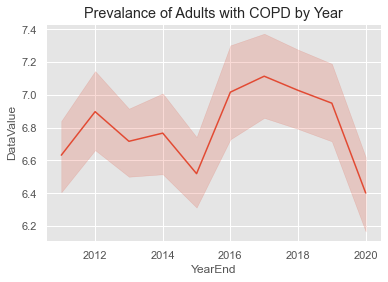

In [25]:
sns.lineplot(data = selected_copd_question, x= "YearEnd", y = "DataValue").set(title = "Prevalance of Adults with COPD by Year") 

[Text(0.5, 1.0, 'Prevalance of Smoking Adults with COPD by Year')]

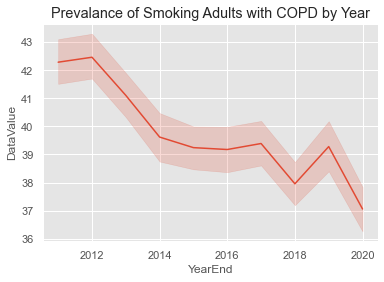

In [26]:
smoking_copd = copd[copd['Question']=='Prevalence of current smoking among adults >= 18 with diagnosed chronic obstructive pulmonary disease']
sns.lineplot(data = smoking_copd, x= "YearEnd", y = "DataValue").set(title = "Prevalance of Smoking Adults with COPD by Year") 

#### Explanation: 
It seems like both of the line plots are showing that the prevalance is gradyally decreasing over several years. Suprising fact is that while the lowest average prevalance value is around 6.4% in 2020, the value for the smoking adults was 37% around 2020. This implies that smoking is a significant factor that causes COPD among adults. 

I could use this implication to use smoking as a confounding factor for research question 1 since smoking both affects the prevalance of COPD among adults and the air quality. Also, it can act as our predictor for research question 2 since the smoking variable significantly affects the prevalance of COPD proven by the visualization.

### Data visualization 2: visualize how prevalance differs by race and gender (do they work as a predictor column for research question 2)

In [18]:
g_copd_question = copd_question[copd_question['StratificationCategory1']=="Gender"]
r_copd_question = copd_question[copd_question['StratificationCategory1']== "Race/Ethnicity"]
g_copd_question.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
79704,2018,2018,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,5.1,...,3.9,6.8,Gender,Male,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENM
79723,2012,2012,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,6.0,...,4.8,7.4,Gender,Female,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENF
79734,2011,2011,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,6.8,...,5.2,8.9,Gender,Male,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENM
79740,2016,2016,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,5.5,...,3.8,7.8,Gender,Male,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENM
79757,2014,2014,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,6.0,...,4.8,7.5,Gender,Female,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENF


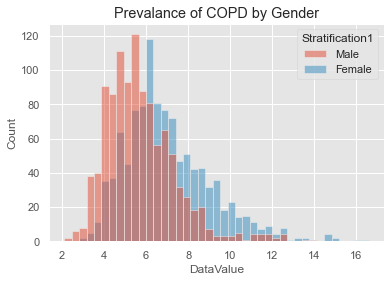

In [28]:
sns.histplot(data = g_copd_question, x= "DataValue", hue = "Stratification1").set(title = "Prevalance of COPD by Gender");

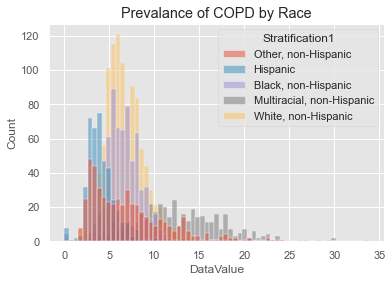

In [29]:
sns.histplot(data = r_copd_question, x= "DataValue", hue = "Stratification1").set(title = "Prevalance of COPD by Race");

#### Explanation :
It seems like distribution of male's prevalance is located on the left of distribution of female's prevalance which implies that the average of males' prevalance is lower than females'. We could assume that female might have more probability to get diagonsed to COPD.

When I look at the Prevalance by Race, it seems like distribution of hispanic has relatively low prevalance than black and white. Also it seems like the distribution of white and black follows the similar distribution. Multiracial, non-hispanic seems to have relatively high prevalance than other races. 

Since it seems like the distribution of prevalance rate differeces by both race and gender, I could assume that these can act as a predictor to predict for research question 2.

# Ozone_Concentration Data set

In [30]:
ozone = pd.read_csv("/Users/kundoongs/Desktop/data102 datasets/Daily_Census_Tract-Level_Ozone_Concentrations__2011-2014.csv")

/Users/kundoongs/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [31]:
ozone.head()

,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_o3_pred,ds_o3_stdd
0,2011,22APR2011,53.0,53063.0,53063011800,47.66531,-117.22963,43.917166,4.850092
1,2011,22APR2011,53.0,53063.0,53063011900,47.66565,-117.25063,43.834730,4.806781
2,2011,22APR2011,53.0,53063.0,53063012000,47.66586,-117.27194,43.842599,5.034627
3,2011,22APR2011,53.0,53063.0,53063012100,47.66418,-117.29271,43.817001,4.892534
4,2011,22APR2011,53.0,53063.0,53063012200,47.67230,-117.32219,43.781775,4.941846


In [32]:
ozone['year'].unique()

array([2011, 2012, '2012', '  "error" : true',
       '  "message" : "Internal error"', '  "status" : 500', '}'],
      dtype=object)

## data cleaning: map statefips to statesabb

I have mapped states_codoes with state abbreviations to add column to both ozone and pm2.5 dataset in order to merge with COPD dataset. 

In [33]:
state_codes = {
    'WA': '53', 'DE': '10', 'DC': '11', 'WI': '55', 'WV': '54', 'HI': '15',
    'FL': '12', 'WY': '56', 'PR': '72', 'NJ': '34', 'NM': '35', 'TX': '48',
    'LA': '22', 'NC': '37', 'ND': '38', 'NE': '31', 'TN': '47', 'NY': '36',
    'PA': '42', 'AK': '02', 'NV': '32', 'NH': '33', 'VA': '51', 'CO': '08',
    'CA': '06', 'AL': '01', 'AR': '05', 'VT': '50', 'IL': '17', 'GA': '13',
    'IN': '18', 'IA': '19', 'MA': '25', 'AZ': '04', 'ID': '16', 'CT': '09',
    'ME': '23', 'MD': '24', 'OK': '40', 'OH': '39', 'UT': '49', 'MO': '29',
    'MN': '27', 'MI': '26', 'RI': '44', 'KS': '20', 'MT': '30', 'MS': '28',
    'SC': '45', 'KY': '21', 'OR': '41', 'SD': '46'
}
state_codes = dict(zip(state_codes.values(), state_codes.keys()))
state_codes = {int(k):v for k,v in state_codes.items()}
#state_codes

In [34]:
ozone['statefips'] = ozone['statefips'].fillna(0)
ozone['statefips'] = ozone['statefips'].astype('int')
ozone['stateAbbr'] = ozone['statefips'].map(state_codes)

ozone['countyfips'] = ozone['countyfips'].fillna(0)
ozone['countyfips'] = ozone['countyfips'].astype('int')
ozone.head()

,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_o3_pred,ds_o3_stdd,stateAbbr
0,2011,22APR2011,53,53063,53063011800,47.66531,-117.22963,43.917166,4.850092,WA
1,2011,22APR2011,53,53063,53063011900,47.66565,-117.25063,43.834730,4.806781,WA
2,2011,22APR2011,53,53063,53063012000,47.66586,-117.27194,43.842599,5.034627,WA
3,2011,22APR2011,53,53063,53063012100,47.66418,-117.29271,43.817001,4.892534,WA
4,2011,22APR2011,53,53063,53063012200,47.67230,-117.32219,43.781775,4.941846,WA


1. 5 states with the highest ozone concentration
2. 5 states with the lowest ozone concentration

3. plot a histogram for all ozone concentration

In [35]:
ozone_top_5 = ozone.groupby("stateAbbr")["ds_o3_pred"].mean().sort_values(ascending = False).head(5)
ozone_top_5

stateAbbr
CO    46.185508
OK    45.999943
AZ    45.970375
NM    45.697450
NV    45.057705
Name: ds_o3_pred, dtype: float64

In [36]:
ozone_bottom_5 = ozone.groupby("stateAbbr")["ds_o3_pred"].mean().sort_values().head(5)
ozone_bottom_5

stateAbbr
WA    28.442865
OR    30.474933
ME    32.442469
MN    33.214274
ND    33.896781
Name: ds_o3_pred, dtype: float64

Text(0.5, 1.0, 'Distribution of Ozone Concentration')

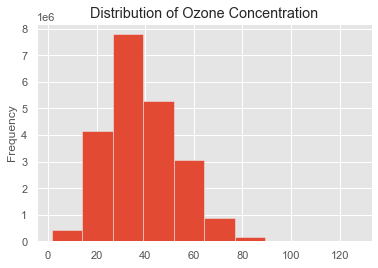

In [41]:
ozone['ds_o3_pred'].plot.hist()
plt.title("Distribution of Ozone Concentration")

It seems like the Ozone concentration distribution follows a unimodal normal distribution centered around 30-40.

### Data Visualization 3: Ozone concentration by countyfips

In [38]:
grouped_ozone = ozone.groupby('countyfips').mean()
grouped_ozone.head()

,statefips,latitude,longitude,ds_o3_pred,ds_o3_stdd
countyfips,,,,,
0,0,NaN,NaN,NaN,NaN
1001,1,32.490296,-86.521727,40.236364,5.637413
1003,1,30.556509,-87.755912,41.053630,5.263831
1005,1,31.865908,-85.330689,40.919092,6.076359
1007,1,33.042010,-87.139075,39.045128,5.334226


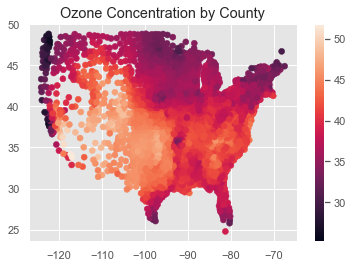

In [39]:
plt.scatter(x=grouped_ozone['longitude'], y=grouped_ozone['latitude'], c= grouped_ozone['ds_o3_pred'])
plt.title('Ozone Concentration by County')
plt.colorbar()
plt.show()

#### Explanation: 
The higher the ozone concentration the more pollution, which seems like Colorado (CO), New Mexico (NM), Utah (UT), Arizona (AZ), Nevada (NV) area has high ozone concentration. 

I have implemented this visualization to check what geographical area has low air quality since it relates to both research question 1 and 2. 

Geographical region can act as an instrumental variable since it affects the air quality but not directly affects the prevalance of COPD. I chould also check if the prevalance of COPD is also high in these areas using the COPD dataset.
Also it could act as a predictor for research question 2 by creating dummy variable of each state since we could find air quality differs by states.

# PM 2.5_Concentration Data set

In [43]:
pmcon = pd.read_csv("/Users/kundoongs/Desktop/data102 datasets/Daily_Census_Tract-Level_PM2.5_Concentrations__2011-2014.csv")

In [44]:
pmcon.head()

,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_pm_pred,ds_pm_stdd
0,2011,24MAY2011,44,44007,44007011600,41.91047,-71.45740,17.140095,2.291852
1,2011,24MAY2011,44,44007,44007011701,41.90844,-71.41556,17.198491,2.195946
2,2011,24MAY2011,44,44007,44007011702,41.89193,-71.42560,17.353419,2.153858
3,2011,24MAY2011,44,44007,44007011800,41.86903,-71.42897,17.618018,2.157761
4,2011,24MAY2011,44,44007,44007011901,41.86059,-71.44743,17.499644,2.182376


In [45]:
pmcon['statefips'] = pmcon['statefips'].fillna(0)
pmcon['statefips'] = pmcon['statefips'].astype('int')
pmcon['stateAbbr'] = pmcon['statefips'].map(state_codes)
pmcon.head()

,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_pm_pred,ds_pm_stdd,stateAbbr
0,2011,24MAY2011,44,44007,44007011600,41.91047,-71.45740,17.140095,2.291852,RI
1,2011,24MAY2011,44,44007,44007011701,41.90844,-71.41556,17.198491,2.195946,RI
2,2011,24MAY2011,44,44007,44007011702,41.89193,-71.42560,17.353419,2.153858,RI
3,2011,24MAY2011,44,44007,44007011800,41.86903,-71.42897,17.618018,2.157761,RI
4,2011,24MAY2011,44,44007,44007011901,41.86059,-71.44743,17.499644,2.182376,RI


1. 5 states with the highest PM 2.5 concentration
2. 5 states with the lowest PM 2.5 concentration

3. plot a histogram for all PM 2.5 concentration

In [46]:
pmcon_top_5 = pmcon.groupby("stateAbbr")["ds_pm_pred"].mean().sort_values(ascending = False).head(5)
pmcon_top_5

stateAbbr
IL    11.391129
IN    11.254079
OH    11.233828
AL    10.534854
PA    10.475301
Name: ds_pm_pred, dtype: float64

In [47]:
pmcon_bottom_5 = pmcon.groupby("stateAbbr")["ds_pm_pred"].mean().sort_values().head(5)
pmcon_bottom_5

stateAbbr
WY    5.397648
MT    5.925131
CO    6.629315
NM    6.631193
ND    6.774198
Name: ds_pm_pred, dtype: float64

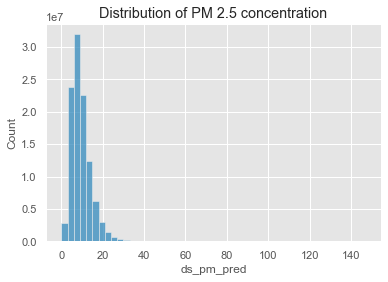

In [48]:
sns.histplot(data = pmcon, x ="ds_pm_pred", binwidth = 3)
plt.title("Distribution of PM 2.5 concentration");
#pmcon['ds_pm_pred'].plot.hist()

In [49]:
pmcon[pmcon['ds_pm_pred']>=40]['year'].value_counts()

2014    34143
2013    31710
2011    24297
2012    10616
Name: year, dtype: int64

### Data Visualization 4: PM 2.5 concentration by countyfips

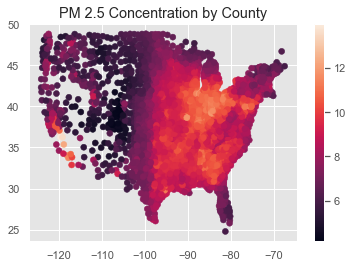

In [50]:
grouped_pmcon = pmcon.groupby('countyfips').mean()
plt.scatter(x=grouped_pmcon['longitude'], y=grouped_pmcon['latitude'], c= grouped_pmcon['ds_pm_pred'])
plt.title("PM 2.5 Concentration by County")
plt.colorbar()
plt.show()

#### Explanation:
Similary, I made a visualization of PM 2.5 concentation by contyfips to get a geographical sense of how air quality differs by states.It seems like IL, IN, OH, KY, TN, AL area has high PM 2.5 concentration. 
By this observation, I thought that I should find out states with ozone concentration greater than 80ppb and PM 2.5 concentration greater than 35.4μg/m3 go get a sense of states with "bad air quality" which is one component of our 1st research question.

### Data Visualization 5 - COPD : how prevalance of COPD differs by year with high/low ozone/pm2.5 concentration

['CO', 'OK', 'AZ', 'NM', 'NV']


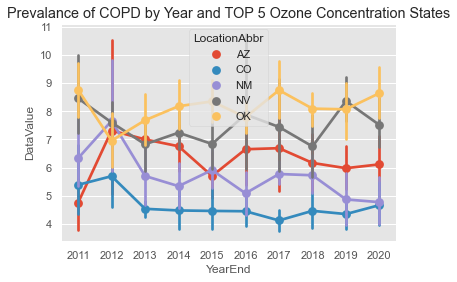

In [51]:
#ozone_top_5 states
ozonetop5 = ozone_top_5.index.to_list()
print(ozonetop5)
selected_copd_question[selected_copd_question['LocationAbbr'].isin(ozonetop5)].head()

sns.pointplot(x = "YearEnd", 
              y = "DataValue", 
              hue = "LocationAbbr", 
              data = selected_copd_question[selected_copd_question['LocationAbbr'].isin(ozonetop5)]
             ).set(title = "Prevalance of COPD by Year and TOP 5 Ozone Concentration States");

First, when I look at the prevalance of COPD of TOP 5 Ozone States,

['WA', 'OR', 'ME', 'MN', 'ND']


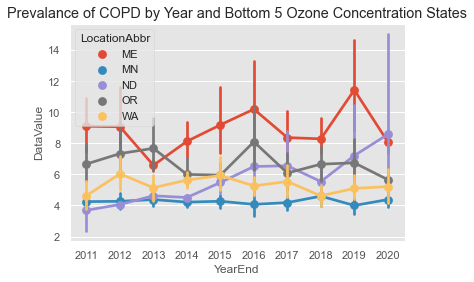

In [52]:
#ozone_bottom_5 states
ozonebottom5 = ozone_bottom_5.index.to_list()
print(ozonebottom5)
selected_copd_question[selected_copd_question['LocationAbbr'].isin(ozonebottom5)].head()

sns.pointplot(x = "YearEnd", 
              y = "DataValue", 
              hue = "LocationAbbr", 
              data = selected_copd_question[selected_copd_question['LocationAbbr'].isin(ozonebottom5)]
             ).set(title = "Prevalance of COPD by Year and Bottom 5 Ozone Concentration States");

['IL', 'IN', 'OH', 'AL', 'PA']


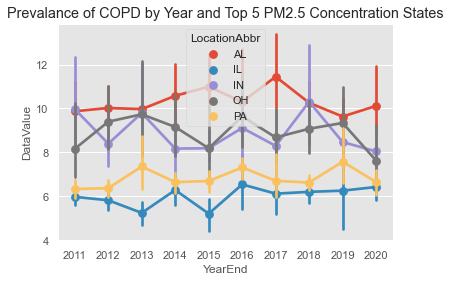

In [53]:
#pmcon_top_5 states
pmcontop5 = pmcon_top_5.index.to_list()
print(pmcontop5)
selected_copd_question[selected_copd_question['LocationAbbr'].isin(pmcontop5)].head()

sns.pointplot(x = "YearEnd", 
              y = "DataValue", 
              hue = "LocationAbbr", 
              data = selected_copd_question[selected_copd_question['LocationAbbr'].isin(pmcontop5)]
             ).set(title = "Prevalance of COPD by Year and Top 5 PM2.5 Concentration States");

['WY', 'MT', 'CO', 'NM', 'ND']


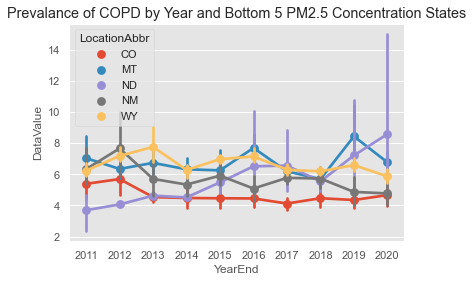

In [54]:
#pmcon_bottom_5 states
pmconbottom5 = pmcon_bottom_5.index.to_list()
print(pmconbottom5)
selected_copd_question[selected_copd_question['LocationAbbr'].isin(pmconbottom5)].head()

sns.pointplot(x = "YearEnd", 
              y = "DataValue", 
              hue = "LocationAbbr", 
              data = selected_copd_question[selected_copd_question['LocationAbbr'].isin(pmconbottom5)]
             ).set(title = "Prevalance of COPD by Year and Bottom 5 PM2.5 Concentration States");

bottom5 states' prevalance ranges between 2 to 8 while top 5 states' prevalance ranges between 4 to 12. 

#### Explanation:
